In [2]:
import os
import pandas as pd
import numpy as np

import glob
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Read results

In [5]:

logs_dir = './logs/modeldata'
all_files = os.listdir(logs_dir)

csv_files = [file for file in all_files ]

print(csv_files)
#csv_files=csv_files[1:2]
csv_files=[csv_files[4],csv_files[5],csv_files[6],csv_files[7]]
print(csv_files)


['_April04_17_16_55_.csv', '_April06_13_56_06_.csv', '_April10_13_36_44_.csv', '_April16_16_41_25_.csv', '_April23_14_41_54_.csv', '_April24_19_14_20_.csv', '_April25_13_41_37_.csv', '_April26_10_09_42_.csv', '_April27_16_36_32_.csv', '_March21_10_50_01_.csv', '_March29_18_58_37_.csv']
['_April23_14_41_54_.csv', '_April24_19_14_20_.csv', '_April25_13_41_37_.csv', '_April26_10_09_42_.csv']


# Box plot

In [6]:
dataframes = []
for file in csv_files:
    file_path = os.path.join(logs_dir, file)
    print(file_path)
    df = pd.read_csv(file_path)
    dataframes.append(df)
df = pd.concat(dataframes, ignore_index=True)

df2 = pd.read_csv(os.path.join(logs_dir, '_April16_16_41_25_.csv'))
df = pd.concat([df, df2[df2['method'] == 'divers_uncer_kCent_greedy']])
print(df)

./logs/modeldata\_April23_14_41_54_.csv
./logs/modeldata\_April24_19_14_20_.csv
./logs/modeldata\_April25_13_41_37_.csv
./logs/modeldata\_April26_10_09_42_.csv
     test accuracy    recall  precision  trainingset_size             type  \
0        74.481798  0.261326   0.787022               500  active learning   
1        77.617140  0.382873   0.804878              1000  active learning   
2        79.777042  0.523204   0.760643              1500  active learning   
3        79.602857  0.536464   0.745203              2000  active learning   
4        80.630552  0.467403   0.851107              2500  active learning   
..             ...       ...        ...               ...              ...   
485      82.041456  0.524309   0.848079              3000  active learning   
486      82.877547  0.539779   0.866903              3500  active learning   
487      83.556872  0.542541   0.894353              4000  active learning   
488      84.358126  0.603867   0.857928              4500  a

# Influence model architecture

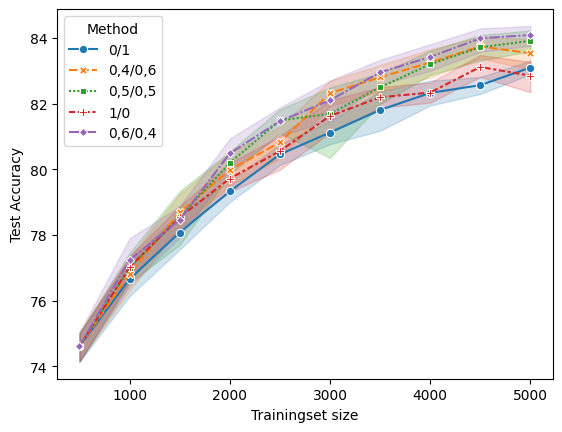

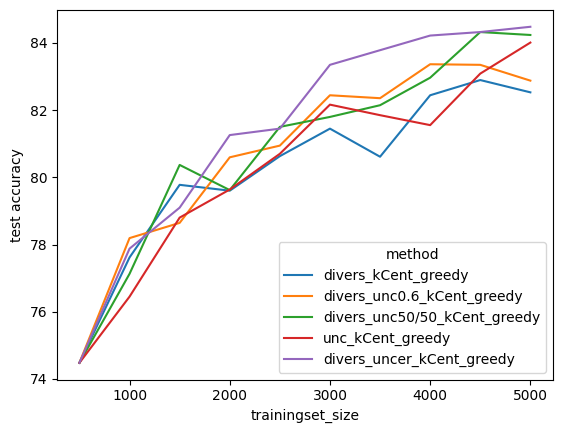

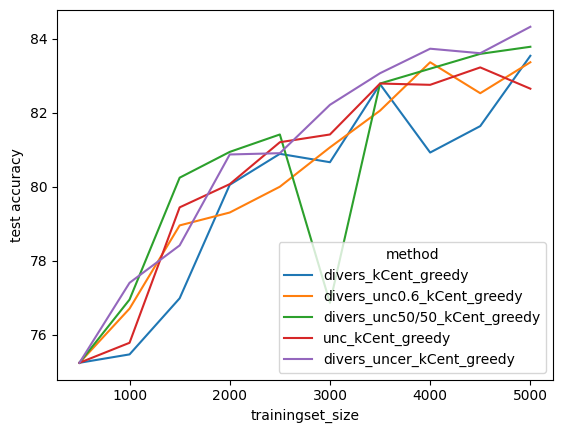

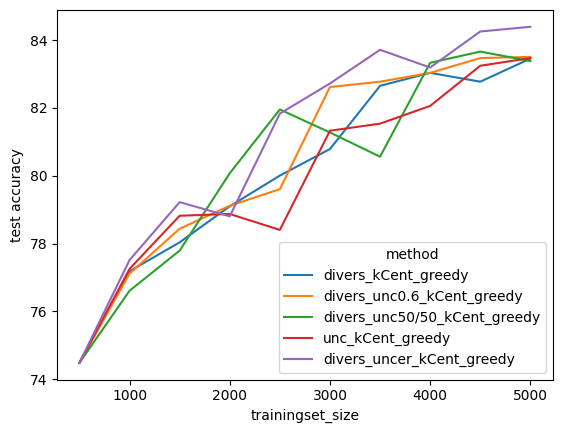

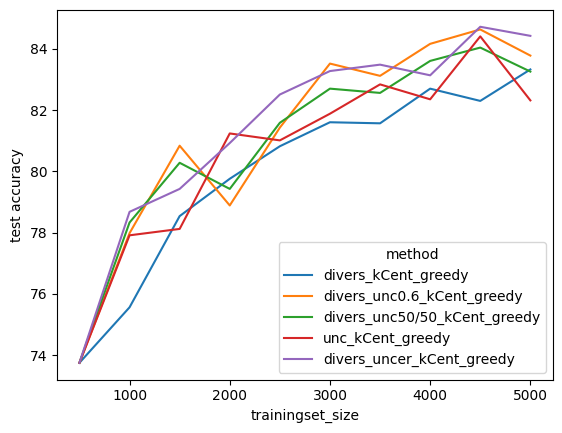

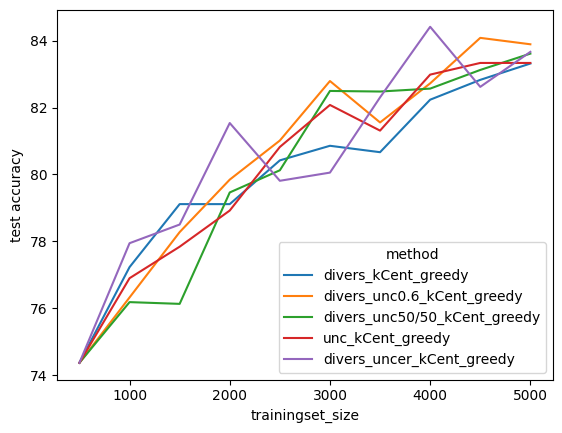

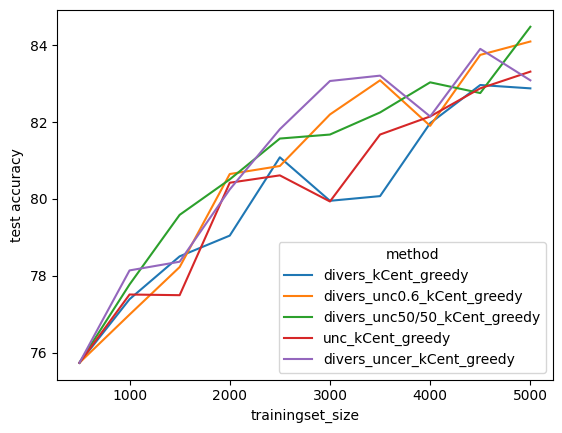

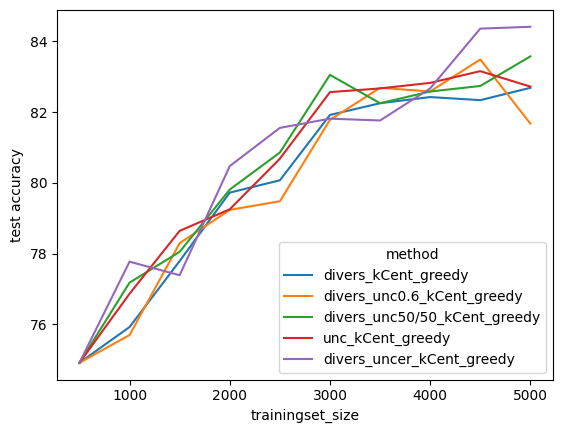

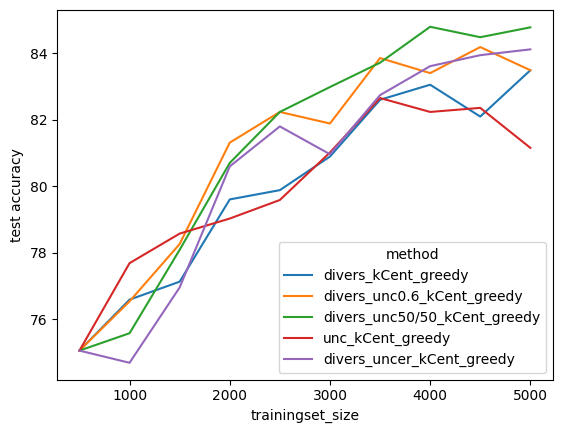

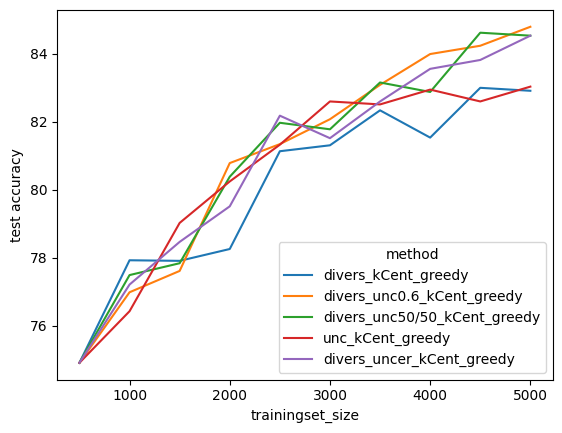

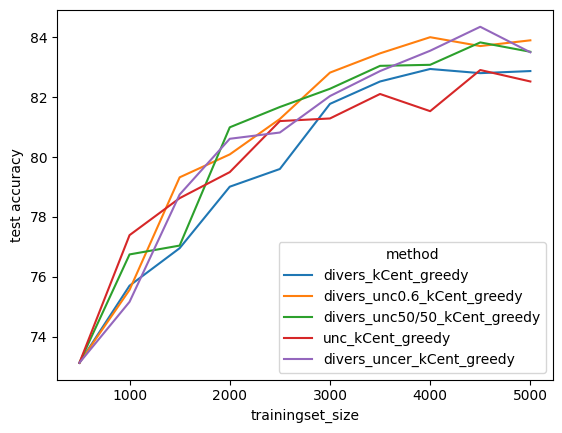

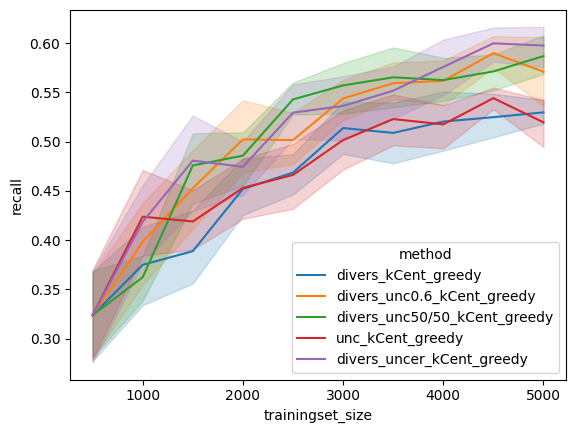

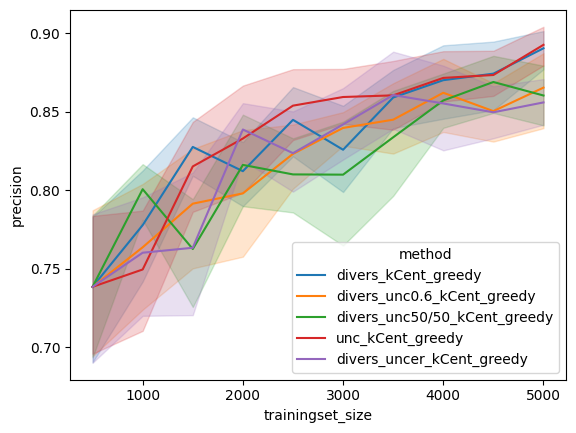

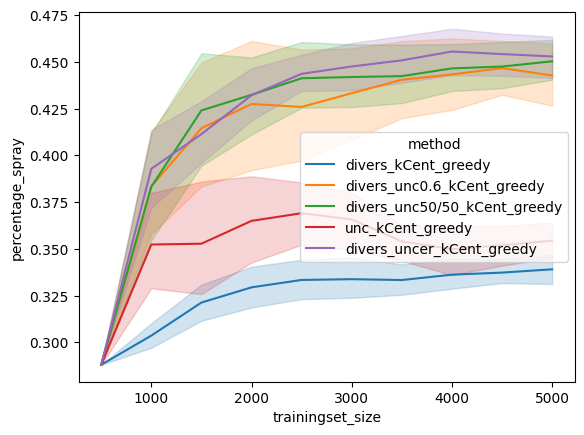

In [28]:
columns = [ 'test accuracy','recall','precision', 'trainingset_size', 'type', 'method','seed','percentage_spray']
#df = pd.concat([df[df['method'] == 'random'], df[df['type'] == 'active learning_no_weight']])
#df=df[df['method'] == 'random']
#df=df[df['type'] == 'active learning_no_weight']

plot=sns.lineplot(data=df, x="trainingset_size", y="test accuracy", hue="method",style='method',markers=True)

plt.xlabel('Trainingset size')
plt.ylabel('Test Accuracy')
handles, labels = plot.get_legend_handles_labels()
custom_labels = ['0/1', '0,4/0,6', '0,5/0,5', '1/0', '0,6/0,4']
plt.legend(handles=handles, labels=custom_labels, title='Method' )


plt.show()
for i in range(10):

    sns.lineplot(data=df[df['seed'] == i], x="trainingset_size", y="test accuracy", hue="method")
    plt.show()

#sns.lineplot(data=df, x="trainingset_size", y="test accuracy", hue="method")
#sns.lineplot(data=sns.lineplot(data=df[''], x="trainingset_size", y="test accuracy", hue="method")

plt.show()
sns.lineplot(data=df, x="trainingset_size", y="recall", hue="method")
plt.show()
sns.lineplot(data=df, x="trainingset_size", y="precision", hue="method")
plt.show()
sns.lineplot(data=df, x="trainingset_size", y="percentage_spray", hue="method")
plt.show()

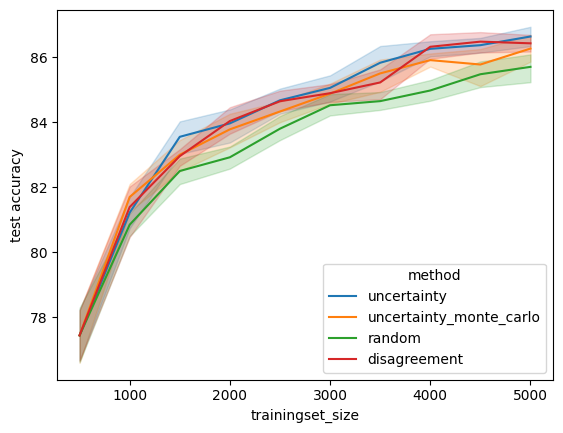

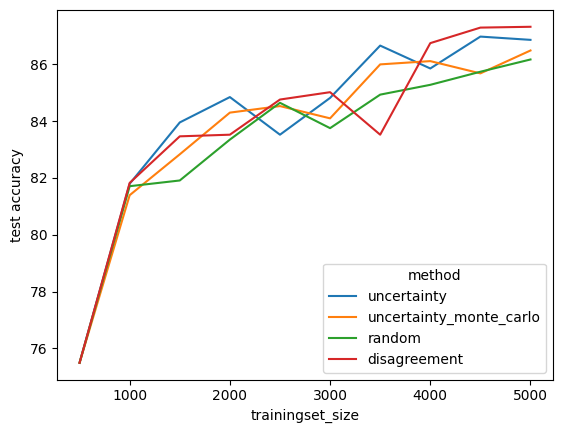

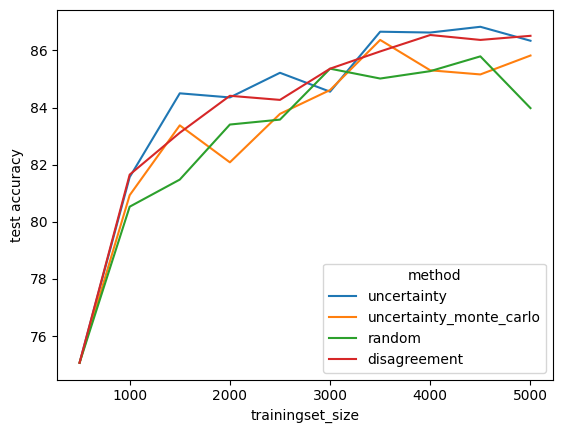

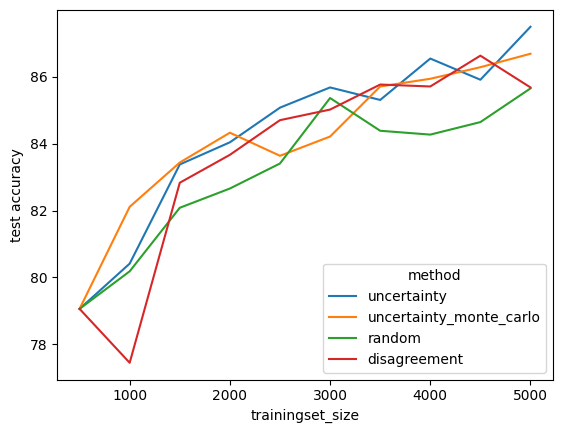

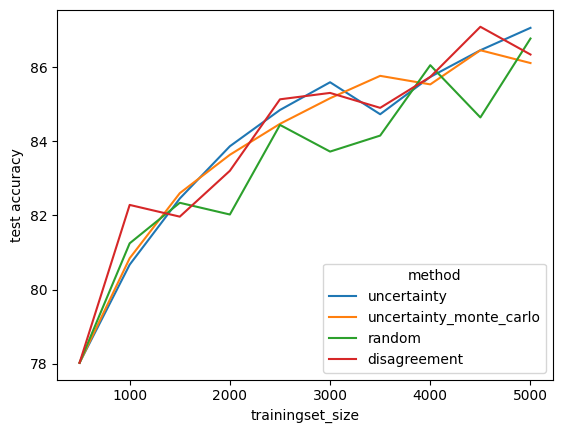

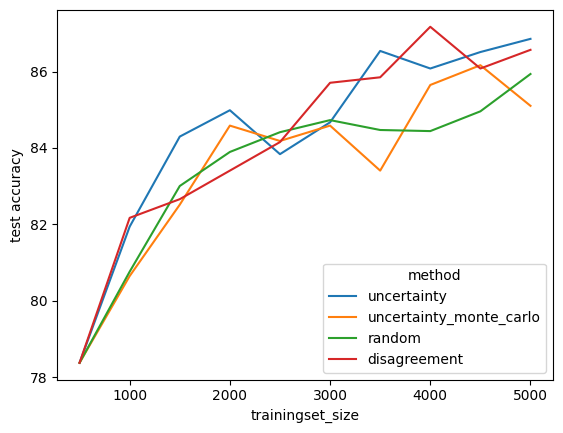

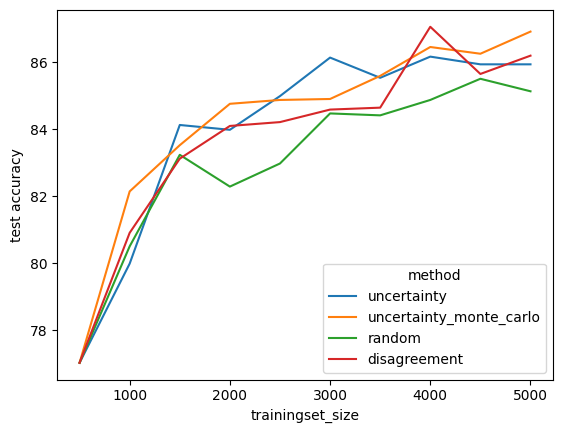

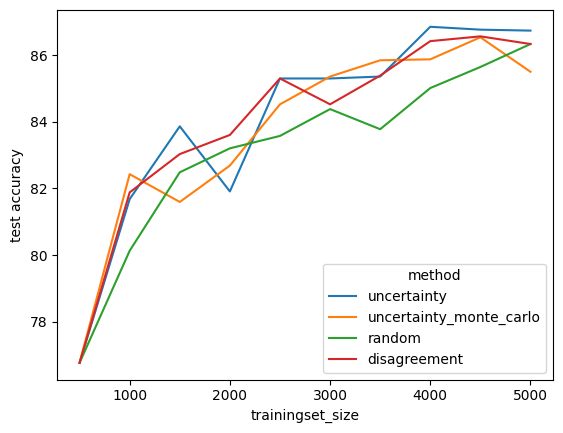

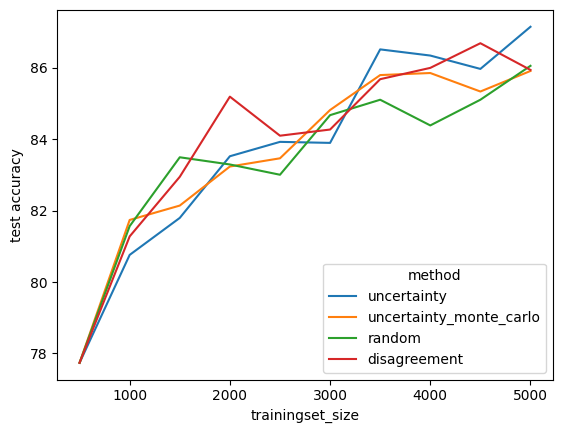

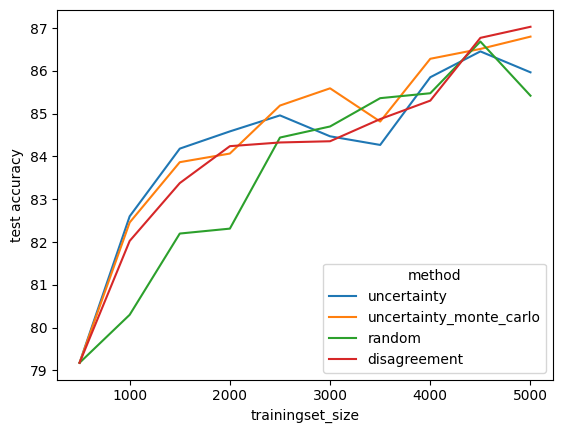

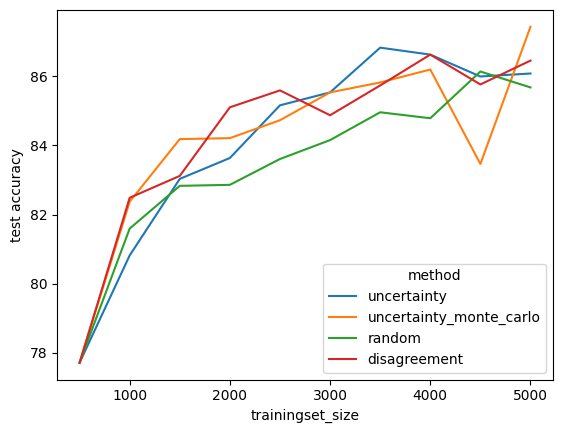

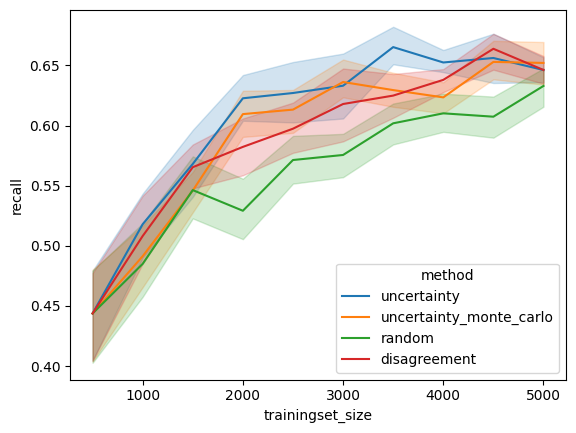

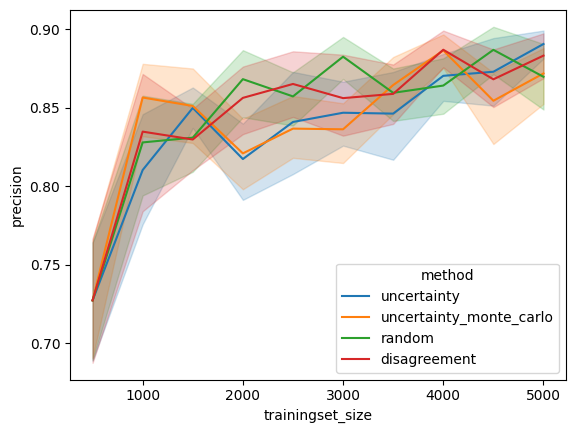

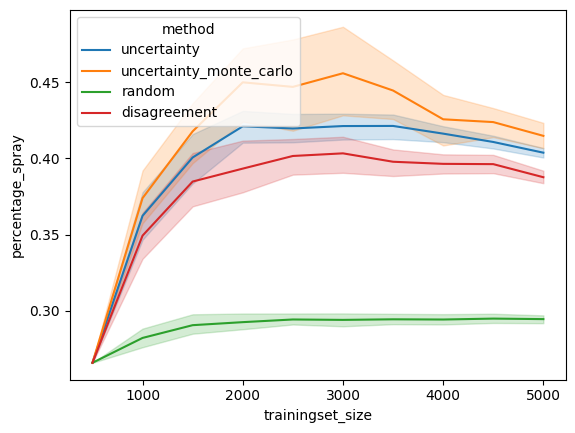

In [ ]:
columns = [ 'test accuracy','recall','precision', 'trainingset_size', 'type', 'method','seed','percentage_spray']
#df = pd.concat([df[df['method'] == 'random'], df[df['type'] == 'active learning_no_weight']])
#df=df[df['method'] == 'random']
#df=df[df['type'] == 'active learning_no_weight']

sns.lineplot(data=df, x="trainingset_size", y="test accuracy", hue="method")
plt.show()
for i in range(10):

    sns.lineplot(data=df[df['seed'] == i], x="trainingset_size", y="test accuracy", hue="method")
    plt.show()

#sns.lineplot(data=df, x="trainingset_size", y="test accuracy", hue="method")
#sns.lineplot(data=sns.lineplot(data=df[''], x="trainingset_size", y="test accuracy", hue="method")

plt.show()
sns.lineplot(data=df, x="trainingset_size", y="recall", hue="method")
plt.show()
sns.lineplot(data=df, x="trainingset_size", y="precision", hue="method")
plt.show()
sns.lineplot(data=df, x="trainingset_size", y="percentage_spray", hue="method")
plt.show()

# Influence preprocessing

## Masking vs pixel remapping

## Crop remap interpolation

Procedure:

* Crop rectangle in frame
* Remap pixels in trapezoid to square

Check influence of interpolation type during remap on the accuracy

# Influence input resolution